IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

LOADING DATASET

In [2]:
car=pd.read_csv("car dataset.csv")

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


CHECKING THE IS THERE ANY DUPLICATES OR MISSING VALUES ARE PRESENT

In [6]:
car.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

DATA  PREPROCESSING AND DATA CLEANING

In [7]:
backup=car.copy()

In [8]:
car=car[car['year'].str.isnumeric()]# year has non year values

In [9]:
car['year']=car['year'].astype(int)#converting non year vlues into numerical values

In [10]:
car=car[car['Price']!='Ask For Price']#price has non numerical values

In [11]:
car['Price']=car['Price'].str.replace(',','').astype(int)# converting price into integer values

In [12]:
# converting non numerical values of kms_driven into numerical values
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)

In [13]:
car=car[~car['fuel_type'].isna()]

CLEANED DATA

In [14]:
car.shape

(816, 6)

In [15]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [16]:
car=car.reset_index(drop=True)

In [17]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [18]:
car.to_csv('Cleaned_Car_data.csv')

In [19]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [20]:
car.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [21]:
car.replace({"fuel_type": {"Petrol": 0, "Diesel": 1, "LPG": 2}}, inplace=True)
print(car)

                       name   company  year   Price  kms_driven  fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000          0
1       Mahindra Jeep CL550  Mahindra  2006  425000          40          1
2         Hyundai Grand i10   Hyundai  2014  325000       28000          0
3    Ford EcoSport Titanium      Ford  2014  575000       36000          1
4                 Ford Figo      Ford  2012  175000       41000          1
..                      ...       ...   ...     ...         ...        ...
811      Maruti Suzuki Ritz    Maruti  2011  270000       50000          0
812          Tata Indica V2      Tata  2009  110000       30000          1
813    Toyota Corolla Altis    Toyota  2009  300000      132000          0
814            Tata Zest XM      Tata  2018  260000       27000          1
815      Mahindra Quanto C8  Mahindra  2013  390000       40000          1

[816 rows x 6 columns]


In [22]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,0
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,1
2,Hyundai Grand i10,Hyundai,2014,325000,28000,0
3,Ford EcoSport Titanium,Ford,2014,575000,36000,1
4,Ford Figo,Ford,2012,175000,41000,1


In [23]:
print(car.columns)

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')


In [24]:
print(car.isnull().sum())
print(car.dtypes)

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64
name          object
company       object
year           int32
Price          int32
kms_driven     int32
fuel_type      int64
dtype: object


In [25]:
print(car['Price'].unique())
print(car['kms_driven'].unique())

[  80000  425000  325000  575000  175000  190000  830000  250000  182000
  315000  415000  320000 1000000  500000  350000  160000  310000   75000
  100000  290000   95000  180000  385000  105000  650000  689999  448000
  549000  501000  489999  280000  349999  284999  345000  499999  235000
  249999 1475000  395000  220000  170000   85000  200000  570000  110000
  448999 1891111  159500  344999  449999  865000  699000  375000  224999
 1200000  195000  351000  240000   90000  155000  600000  189500  210000
  390000  135000 1600000  701000  265000  525000  372000  635000  550000
  485000  329500  251111  569999   69999  299999  399999  450000  270000
  158400  179000  125000  299000  150000  285000  340000   70000  289999
  849999  749999  274999  984999  599999  244999  474999  245000  169500
  275000  370000  168000  145000   98500  209000  185000  900000  699999
  199999  544999  199000  540000   49000  700000   55000  895000  355000
  565000  365000   40000  400000  330000  580000  3

In [26]:
# statistical measurements
car.describe()
car['Price'].describe()

count    8.160000e+02
mean     4.117176e+05
std      4.751844e+05
min      3.000000e+04
25%      1.750000e+05
50%      2.999990e+05
75%      4.912500e+05
max      8.500003e+06
Name: Price, dtype: float64

In [27]:
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

DATA VISUALIZATION

CHECKING RELATIONSHIP BETWEEN kms_driven with Price

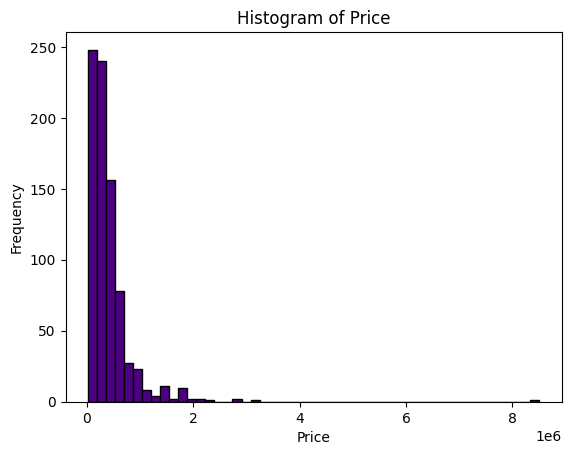

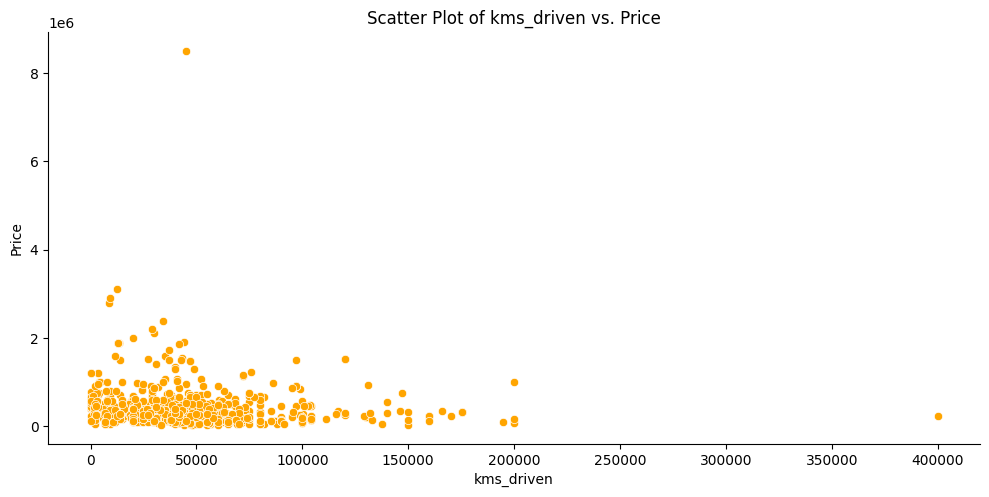

In [28]:
plt.hist(car['Price'], bins=50, edgecolor='black',color= "indigo")
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

sns.relplot(x='kms_driven',y='Price',data=car,height=5,aspect=2,color="orange")
plt.title('Scatter Plot of kms_driven vs. Price')
plt.xlabel('kms_driven')
plt.ylabel('Price')
plt.show()

CHECKING RELATIONSHIP BETWEEN FUEL TYPE AND PRICE

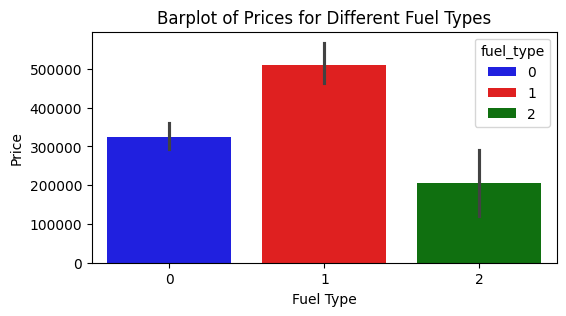

In [29]:
plt.subplots(figsize=(6, 3))
sns.barplot(x='fuel_type', y='Price', data=car, hue='fuel_type', palette=["blue", "red", "green"])
plt.title('Barplot of Prices for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

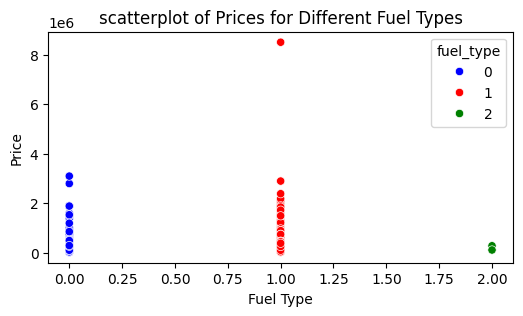

In [30]:
import numpy as np
plt.subplots(figsize=(6, 3))
sns.scatterplot(x='fuel_type', y='Price', data=car, hue='fuel_type', palette=["blue", "red", "green"])
plt.title('scatterplot of Prices for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

CHECKING RELATIONSHIP BETWEEN COMPANIES AND PRICE

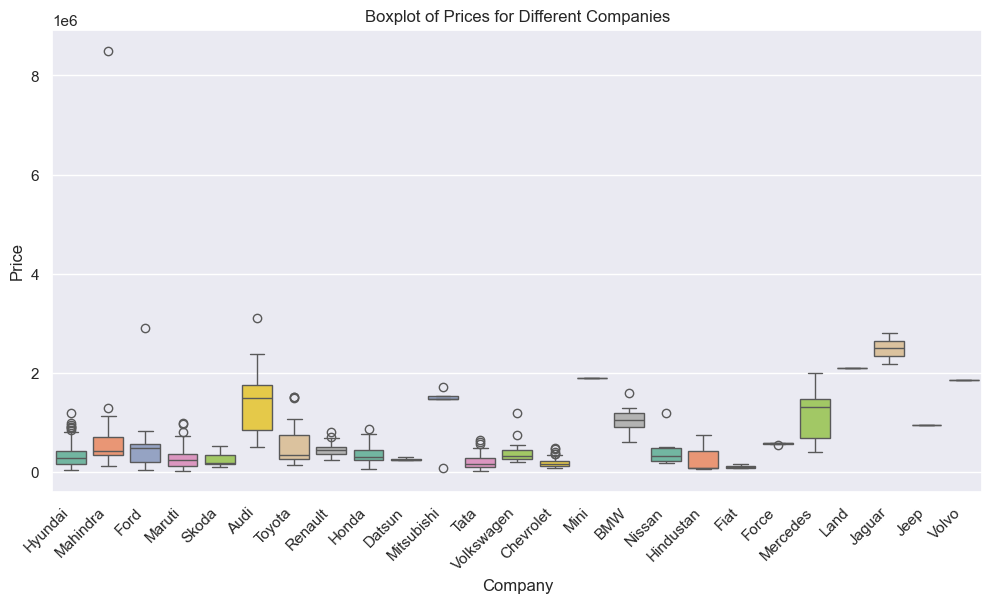

In [31]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='company', y='Price', data=car, hue="company",palette="Set2")
plt.title('Boxplot of Prices for Different Companies')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

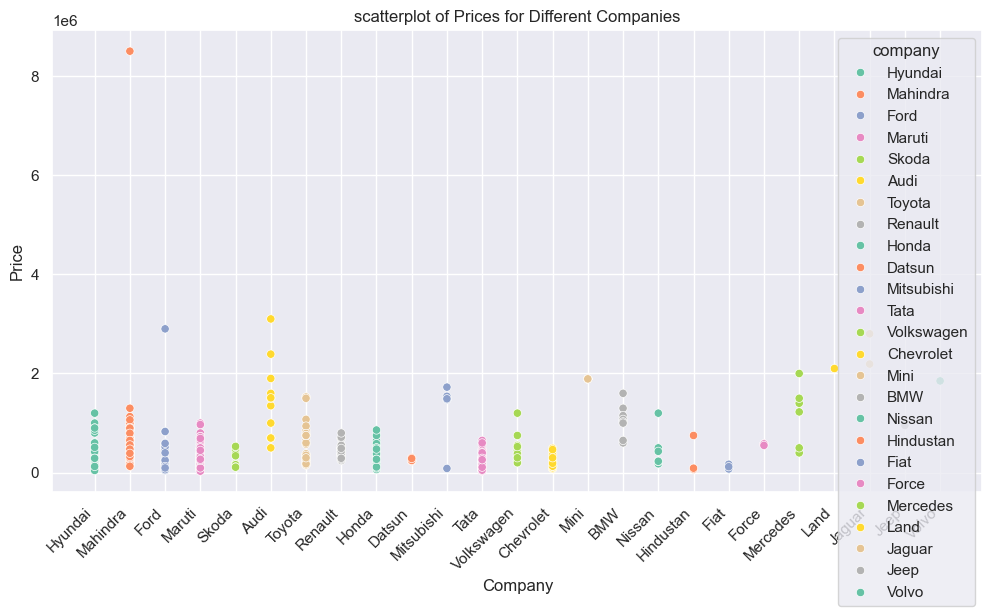

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='company', y='Price', data=car, hue="company",palette="Set2")
plt.title('scatterplot of Prices for Different Companies')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

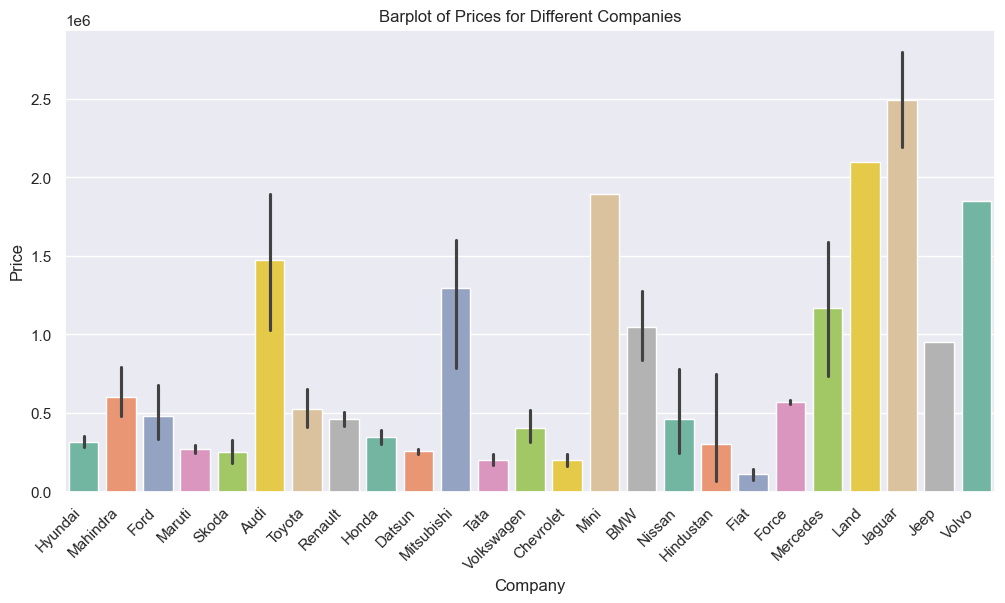

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='company', y='Price', data=car, hue="company",palette="Set2")
plt.title('Barplot of Prices for Different Companies')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

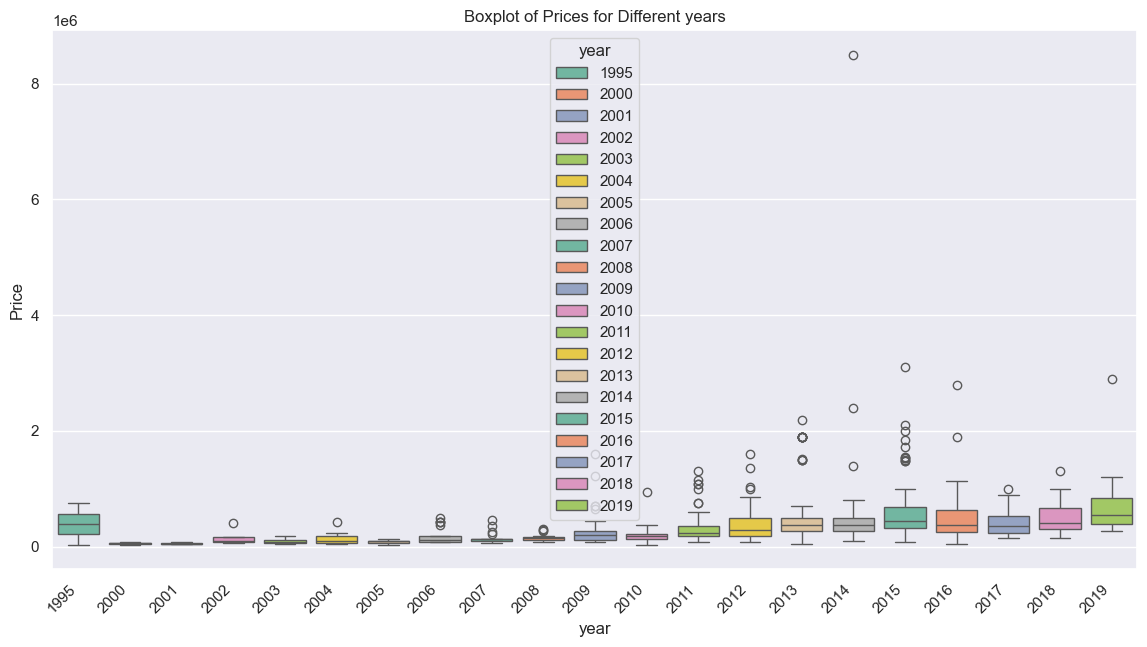

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 7))
sns.boxplot(x='year', y='Price', data=car, hue="year",palette="Set2")
plt.title('Boxplot of Prices for Different years')
plt.xlabel('year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


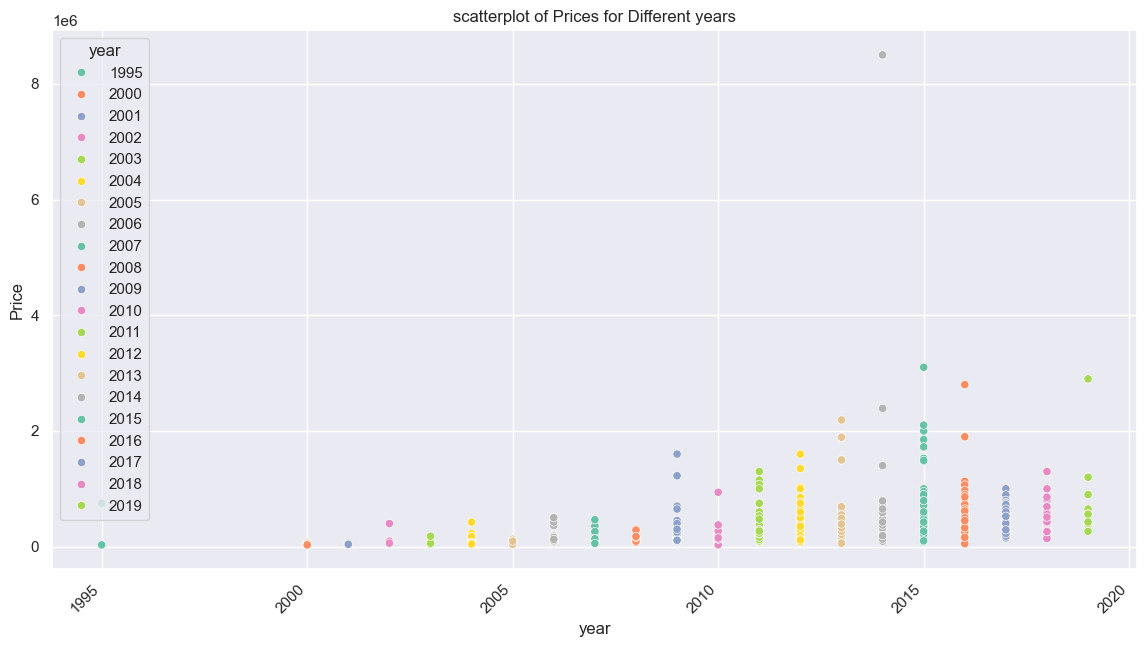

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 7))
sns.scatterplot(x='year', y='Price', data=car, hue="year",palette="Set2")
plt.title('scatterplot of Prices for Different years')
plt.xlabel('year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


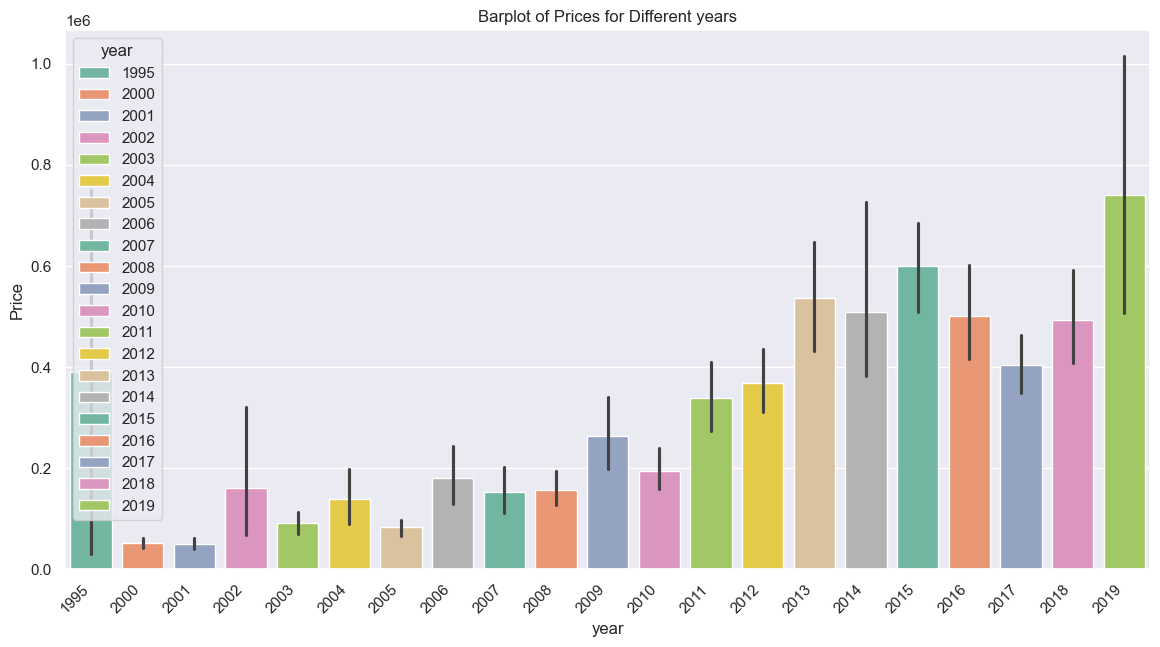

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 7))
sns.barplot(x='year', y='Price', data=car, hue="year",palette="Set2")
plt.title('Barplot of Prices for Different years')
plt.xlabel('year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

CHECKING THE RELATIONSHIP BETWEEN PRICE WITH YEAR ,FUELTYPE,COMPANIES

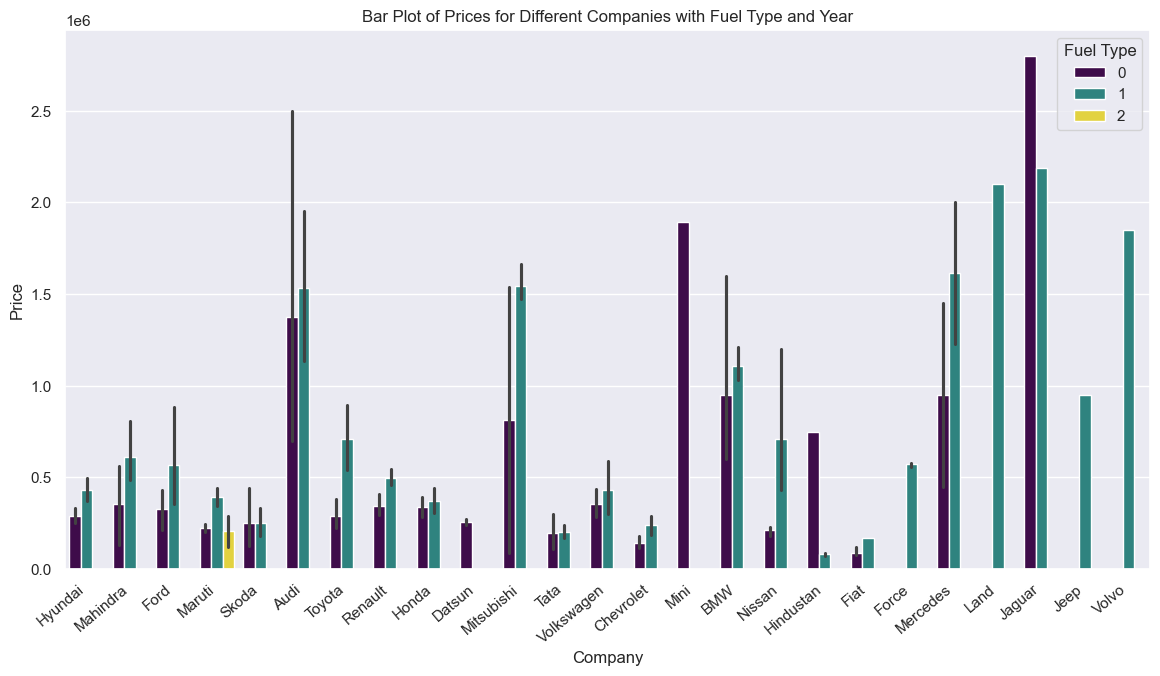

In [37]:
plt.figure(figsize=(14, 7))
sns.barplot(x='company', y='Price', data=car, hue='fuel_type', palette='viridis')
plt.xticks(rotation=40, ha='right')
plt.title('Bar Plot of Prices for Different Companies with Fuel Type and Year')
plt.xlabel('Company')
plt.ylabel('Price')
plt.legend(title='Fuel Type', bbox_to_anchor=(1, 1))  
plt.show()

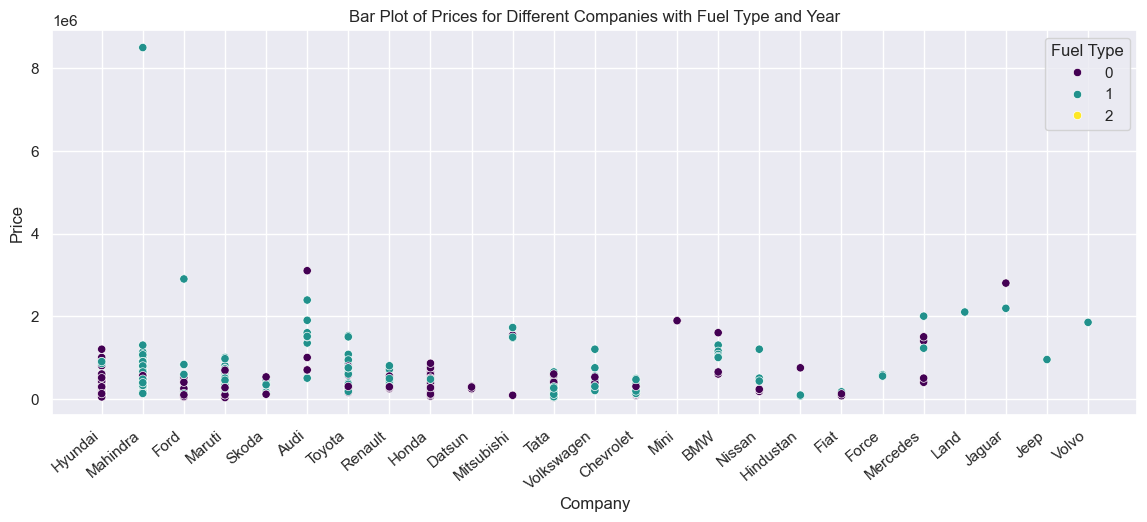

In [38]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x='company', y='Price', data=car, hue='fuel_type', palette='viridis')
plt.xticks(rotation=40, ha='right')
plt.title('Bar Plot of Prices for Different Companies with Fuel Type and Year')
plt.xlabel('Company')
plt.ylabel('Price')
plt.legend(title='Fuel Type', bbox_to_anchor=(1, 1))  
plt.show()

EXTRACTING THE TRAINING DATAS

In [39]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [40]:
X.shape

(816, 5)

In [41]:
y.shape

(816,)

APPLYING TRAIN TEST SPLIT

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

USING OneHotEncoder TO CONTAIN ALL THE POSSIBLE CATEGORIES

In [44]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

USING COLUMN TRANSFORMER TO TRANSFORM THE CATEGORICAL VALUES

In [45]:
column_trans=make_column_transformer((OneHotEncoder(handle_unknown='ignore',categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

Linear Regression Model

In [46]:
lr=LinearRegression()

MAKING PIPELINE

In [47]:
pipe=make_pipeline(column_trans,lr)

FITTING THE MODEL

In [48]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array([0, 1, 2], dtype=int64)],
                                                                handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [49]:
y_pred=pipe.predict(X_test)

CHECKING THE r2 SCORE

In [63]:
r2_score(y_test,y_pred)

0.8604434835257248

In [58]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [59]:
np.argmax(scores)

247

In [60]:
scores[np.argmax(scores)]

0.8604434835257248

PREDICTING NEW DATAS

In [61]:
import numpy as np
column_names = X_test.columns
new_data = pd.DataFrame(data=np.array(['Ford EcoSport Titanium','Ford',2014,36000,'Diesel']).reshape(1, -1), columns=column_names)
prediction = pipe.predict(new_data)
print(prediction)

[525247.45665182]


Finding the model with a random state of TrainTestSplit

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 120904.88305013518
Mean Squared Error: 28715264719.12045
R2 Score: 0.8604434835257248
